<a href="https://colab.research.google.com/github/bombermal/Bootcamp_Data_Science_Aplicada_Alura_2020/blob/main/Desafio_Modulo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resumo

Nesse trabalho fiz uma breve exploração de dados de Covid-19, busquei entender que informações importantes poderiamos tirar dos arquivos utilizados assim como que possíveis respostas poderiamos alcançar. 

# Introdução
Comecei tentando analisar o arquivo de óbitos disponibilisado no GitHub da Alura, porém não consegui chegar a conclusões que considerei interessantes. Tentei utilizar outros dados do *World Bank* [link] https://www.worldbank.org, mas não consegui relaciona-los de maneira eficiente. Por essa razão, resolvi voltar ao início e tratar os dados de covid, também disponíveis no GitHub da Aluna, conforme o link disponibilizado acima.

# Metodologia
Busquei estruturar o trabalho de uma maneira que o leitor consiga acompanhar minha linha de raciocínio e entender como cheguei a determinadas conclusões e/ou hipóteses.

# Bibliotecas

Bibliotecas utilizadas nessa análise

- Organização dos dados:
  - Pandas
- Visualização dos dados:
  - Seaborn
  - Matplotlib.pyplot
- Visualização de dados faltantes  
  - Missingno
- Expressões regulares
  - Re

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import missingno as msno

# Carregamento dos dados

In [ ]:
#Montar drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Bootcamp Data Science Aplicada - 2020/M1/db_desafio_1/"
#Carregar csv
dataRaw = pd.read_csv(path+"caso.csv") #data da obtenção do dado no site do Brasil.IO - 08/01/21
#Observar a tabela carregada
dataRaw.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-12-31,AP,NaN,state,68201,925,283,False,845731.0,861773.0,16.0,7914.03305,0.0136
1,2020-12-30,AP,NaN,state,67702,919,282,False,845731.0,861773.0,16.0,7856.12917,0.0136
2,2020-12-29,AP,NaN,state,67405,913,281,False,845731.0,861773.0,16.0,7821.66533,0.0135
3,2020-12-28,AP,NaN,state,67149,907,280,False,845731.0,861773.0,16.0,7791.95914,0.0135
4,2020-12-27,AP,NaN,state,66724,901,279,False,845731.0,861773.0,16.0,7742.64220,0.0135


# Análise e preparação dos dados

A seguir verifico dados faltantes e vejo que tipo de pré processamento dos dados se faz necessário

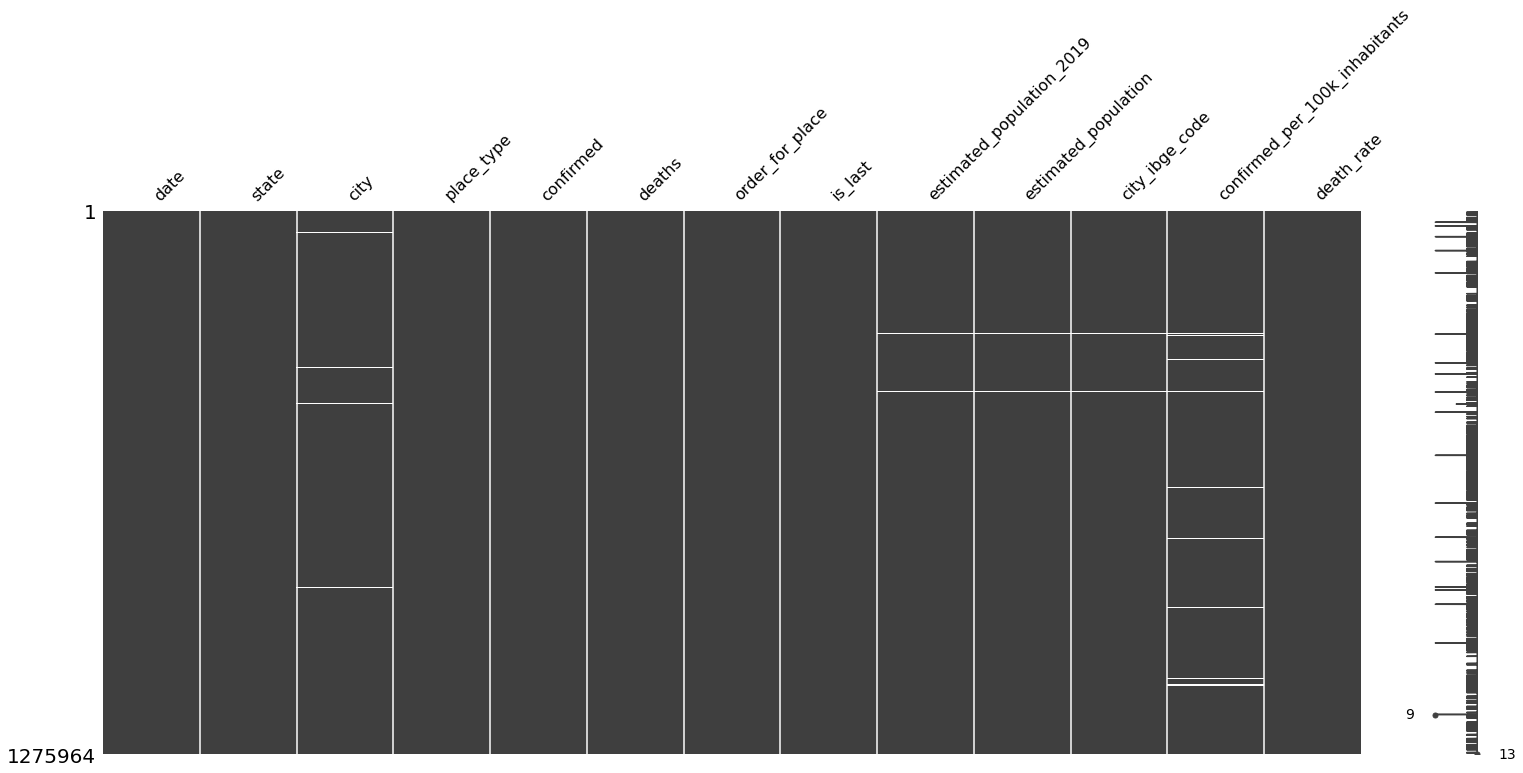

In [ ]:
#Observando dados faltantes
msno.matrix(dataRaw)

# Pré processamento

Como percebemos anteriormente, encontramos alguns dados faltantes na tabela carregada. Optei por subistituílos no lugar de remove-los. As colunas com números faltantes foram preenchidas com **0** e na coluna **city** não há nome sempre que o dado registrado se refere ao estado, sendo assim, resolvi preenchê-lo com **estado**.

## 1 - Remoção de valores faltantes

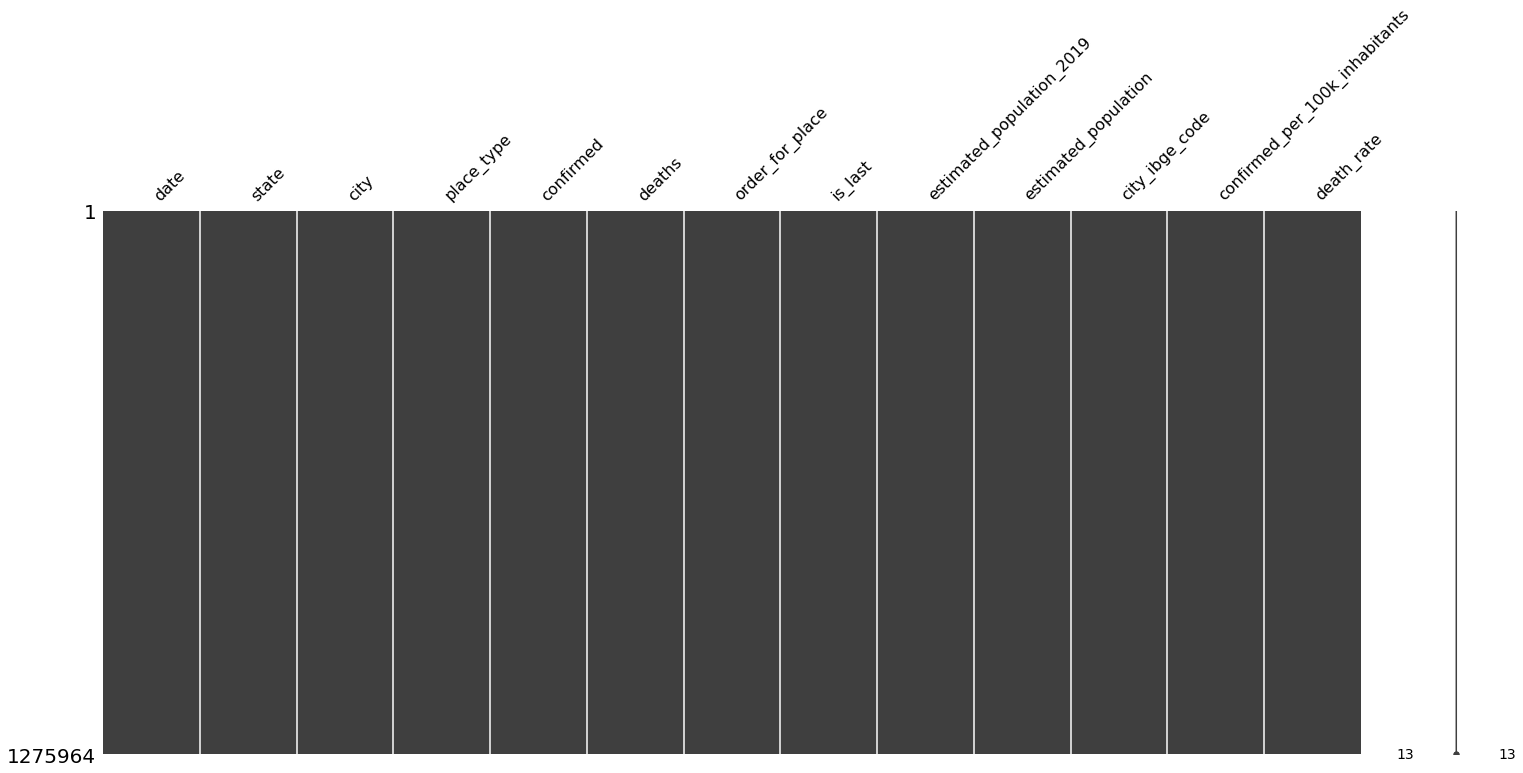

In [ ]:
#Substituição dos valores numéricos faltantes
dataRaw.loc[:,"place_type":] = dataRaw.loc[:,"place_type":].fillna(0)
#Subistituição dos valores nominais faltantes
dataRaw.city = dataRaw.city.fillna("estado")
#Matrix de dados faltantes
msno.matrix(dataRaw)

## 2 - Checar os tipos das colunas

In [ ]:
#Checando os tipos das colunas
dataRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275964 entries, 0 to 1275963
Data columns (total 13 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   date                            1275964 non-null  object 
 1   state                           1275964 non-null  object 
 2   city                            1275964 non-null  object 
 3   place_type                      1275964 non-null  object 
 4   confirmed                       1275964 non-null  int64  
 5   deaths                          1275964 non-null  int64  
 6   order_for_place                 1275964 non-null  int64  
 7   is_last                         1275964 non-null  bool   
 8   estimated_population_2019       1275964 non-null  float64
 9   estimated_population            1275964 non-null  float64
 10  city_ibge_code                  1275964 non-null  float64
 11  confirmed_per_100k_inhabitants  1275964 non-null  float64
 12  

## 3 - Corrigir os tipos das colunas

In [ ]:
#Convertendo as colunas para os tipos corretos e 'date' para datetime
dataRaw = dataRaw.convert_dtypes(convert_integer=False,infer_objects=False)
dataRaw.date = pd.to_datetime(dataRaw.date)
dataRaw[["confirmed", "deaths"]] =dataRaw[["confirmed", "deaths"]].astype("float64")

## 4 - Separação dos dados
Criando mais uma tabela com dados dos estados esclusivamente

In [ ]:
dataStates = dataRaw[dataRaw.place_type == "state"].copy()
dataStates.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-12-31,AP,estado,state,68201.0,925.0,283,False,845731.0,861773.0,16.0,7914.03305,0.0136
1,2020-12-30,AP,estado,state,67702.0,919.0,282,False,845731.0,861773.0,16.0,7856.12917,0.0136
2,2020-12-29,AP,estado,state,67405.0,913.0,281,False,845731.0,861773.0,16.0,7821.66533,0.0135
3,2020-12-28,AP,estado,state,67149.0,907.0,280,False,845731.0,861773.0,16.0,7791.95914,0.0135
4,2020-12-27,AP,estado,state,66724.0,901.0,279,False,845731.0,861773.0,16.0,7742.64220,0.0135


# Análise

## 1 - Descrição das colunas

Esse trecho foi recortado do github onde os dados do covid estão armazenados, logo a baixo temos a descrição das colunas no arquivo.

---

Número de casos confirmados e óbitos por município por dia, segundo as
Secretarias Estaduais de Saúde.

- API: https://brasil.io/api/dataset/covid19/caso/data
- Dados completos para download: https://data.brasil.io/dataset/covid19/caso.csv.gz

Colunas:

- 🔍 `search`: passe algum valor para executar a busca por texto completo, que
  compreende algumas das colunas da tabela.
- 🔍 `date`: data de coleta dos dados no formato YYYY-MM-DD.
- 🔍 `state`: sigla da unidade federativa, exemplo: SP.
- 🔍 `city`: nome do município (pode estar em branco quando o registro é
  referente ao estado, pode ser preenchido com `Importados/Indefinidos`
  também).
- 🔍 `place_type`: tipo de local que esse registro descreve, pode ser `city` ou
  `state`.
- 🔍 `order_for_place`: número que identifica a ordem do registro para este
  local. O registro referente ao primeiro boletim em que esse local aparecer
  será contabilizado como `1` e os demais boletins incrementarão esse valor.
- 🔍 `is_last`: campo pré-computado que diz se esse registro é o mais novo para
  esse local, pode ser `True` ou `False` (caso filtre por esse campo, use
  `is_last=True` ou `is_last=False`, **não use o valor em minúsculas**).
- 🔍 `city_ibge_code`: código IBGE do local.
- `confirmed`: número de casos confirmados.
- `deaths`: número de mortes.
- `estimated_population`: população estimada para esse município/estado em
  2020, [segundo o
  IBGE](https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?=&t=resultados).
  ([acesse o script que faz o download e conversão dos dados de
  população](https://github.com/turicas/censo-ibge)).
- `estimated_population_2019`: população estimada para esse município/estado em
  2019, [segundo o
  IBGE](https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?=&t=resultados).
  **ATENÇÃO**: essa coluna possui valores desatualizados, prefira usar a coluna
  `estimated_population`.
- `confirmed_per_100k_inhabitants`: número de casos confirmados por 100.000
  habitantes (baseado em `estimated_population`).
- `death_rate`: taxa de mortalidade (mortes / confirmados).

🔍 = colunas que podem ser filtrados via query string na API e na interface.

---

## 2 - Entender que tipo de valores estão presentes na tabela.

O intuito aqui é entender o que há na tabela, e posteriormente criar hipóteses a serem respondidas

In [ ]:
def plotBy(df,rows,cols,filterCondition,x,y,sharex=True,sharey=True,hue=False,hueName="",figsize=(20,20)):
  """
    função criada para plotar grades de gráficos 
    df: DataFrame
      DataFrame com dados a serem utilizados
    rows: int
      Número de linhas da grade
    cols: int
      Número de colunas da grade
    filterCondition: string
      Coluna que será utilizada como base para a separação de cada gráfico
    x/y: string
      Nome da coluna que será utilizada como eixo x/y
    sharex/y: bool
      Identifica se os gráficos compartilharão os eixos x e y
  """
  conditionList = df[filterCondition].unique()

  #tamanho da grade de gráficos, colunas e linhas
  nrows=rows
  ncols=cols
  fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize,tight_layout=True, sharey=sharey,sharex=sharex)

  row = 0
  for col, ii in enumerate(conditionList):
    #mascara com o filtro aplicado no DataFrame
    mask = df[filterCondition] == ii
    if hue:
      sns.lineplot(data=df[mask], x="date", y=y, hue=hueName, ax=axes[row%nrows,col%ncols])
    else:
      sns.lineplot(data=df[mask], x="date", y=y, ax=axes[row%nrows,col%ncols])
    #Cosméticos: Despine, formato dos números e título
    sns.despine(top=True, right=True, ax=axes[row%nrows,col%ncols])
    axes[row%nrows,col%ncols].ticklabel_format(style='plain', axis='y')
    axes[row%nrows,col%ncols].set_title(ii)
      
    if col%ncols==ncols-1:
        row +=1
    
    plt.setp(axes[row%nrows,col%ncols].get_xticklabels(), rotation=45)

### I - Death_rate
Coluna que representa a taxa de morte registrada

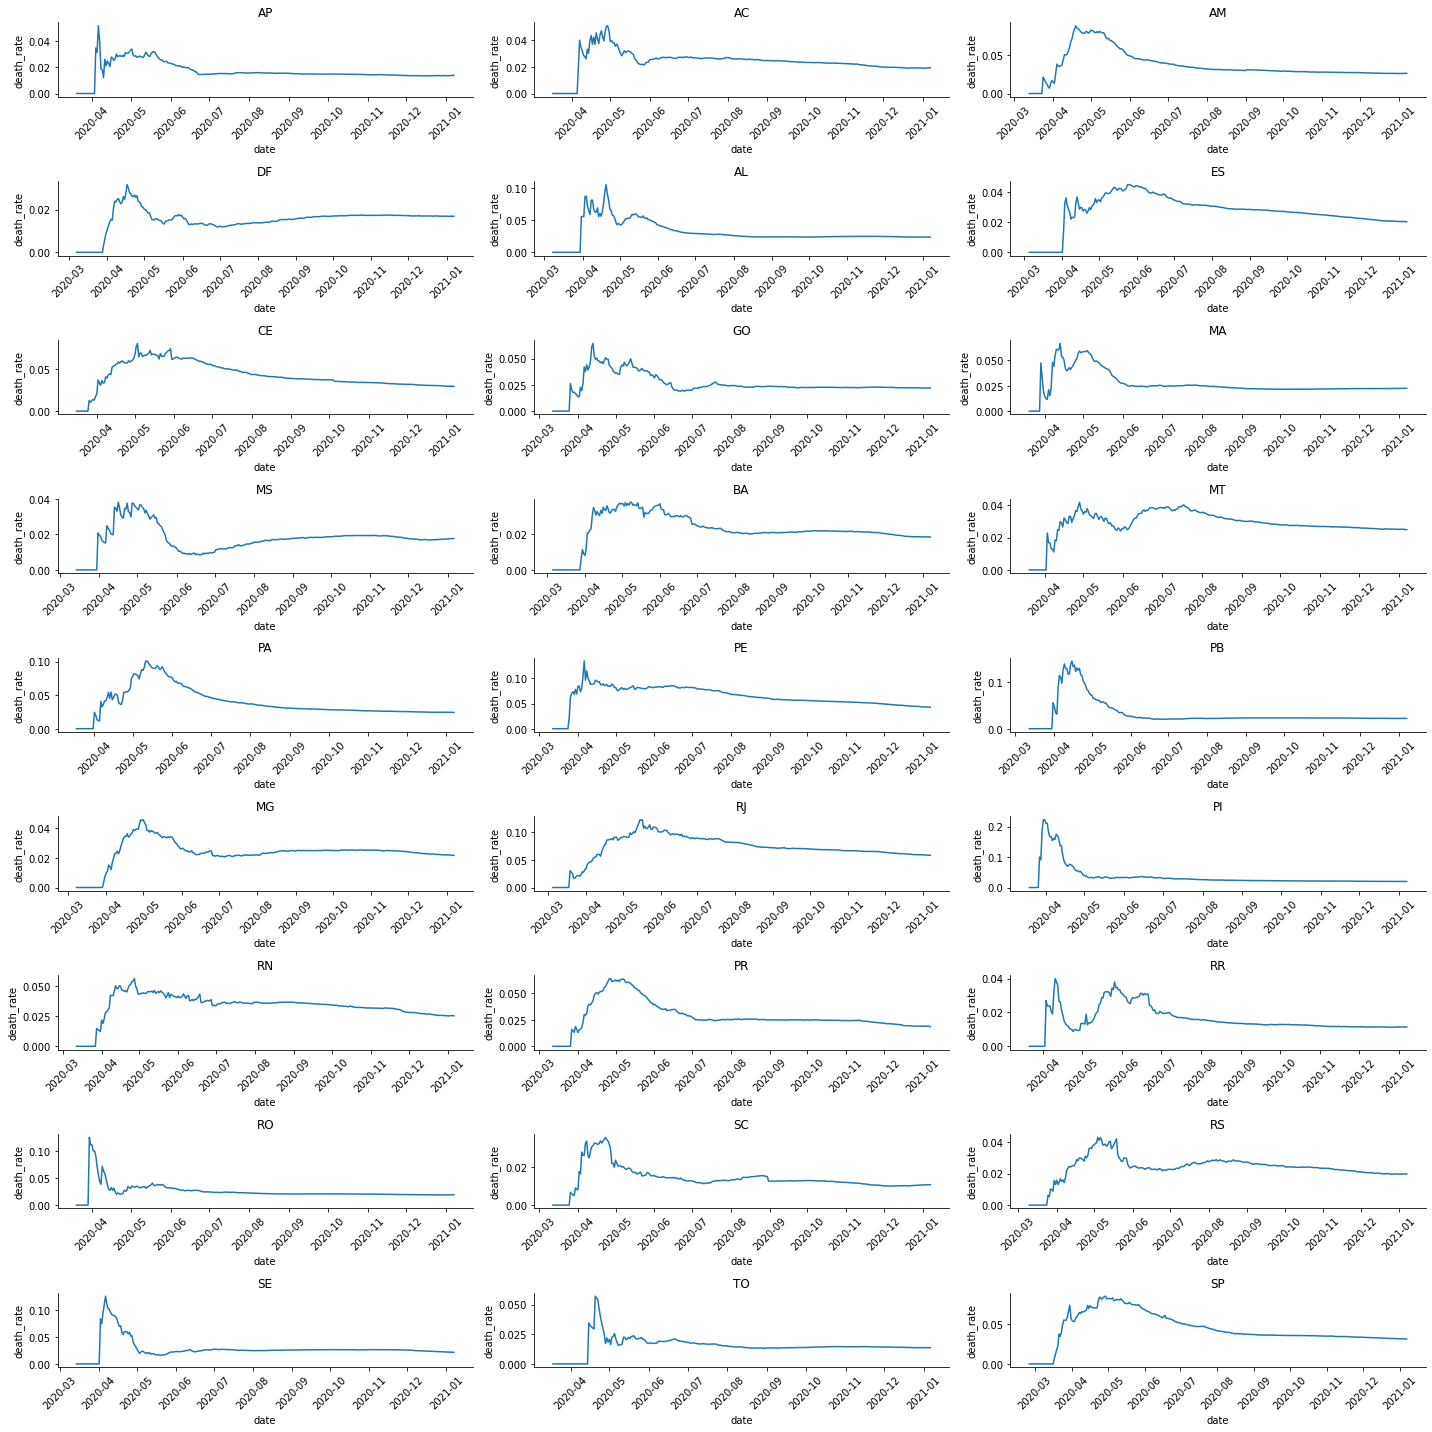

In [ ]:
#Visão geral da taxa de mortes por estado       
plotBy(dataStates, 9, 3, "state", "date", "death_rate", False, False)

### II - Confirmed
Número de casos confirmados

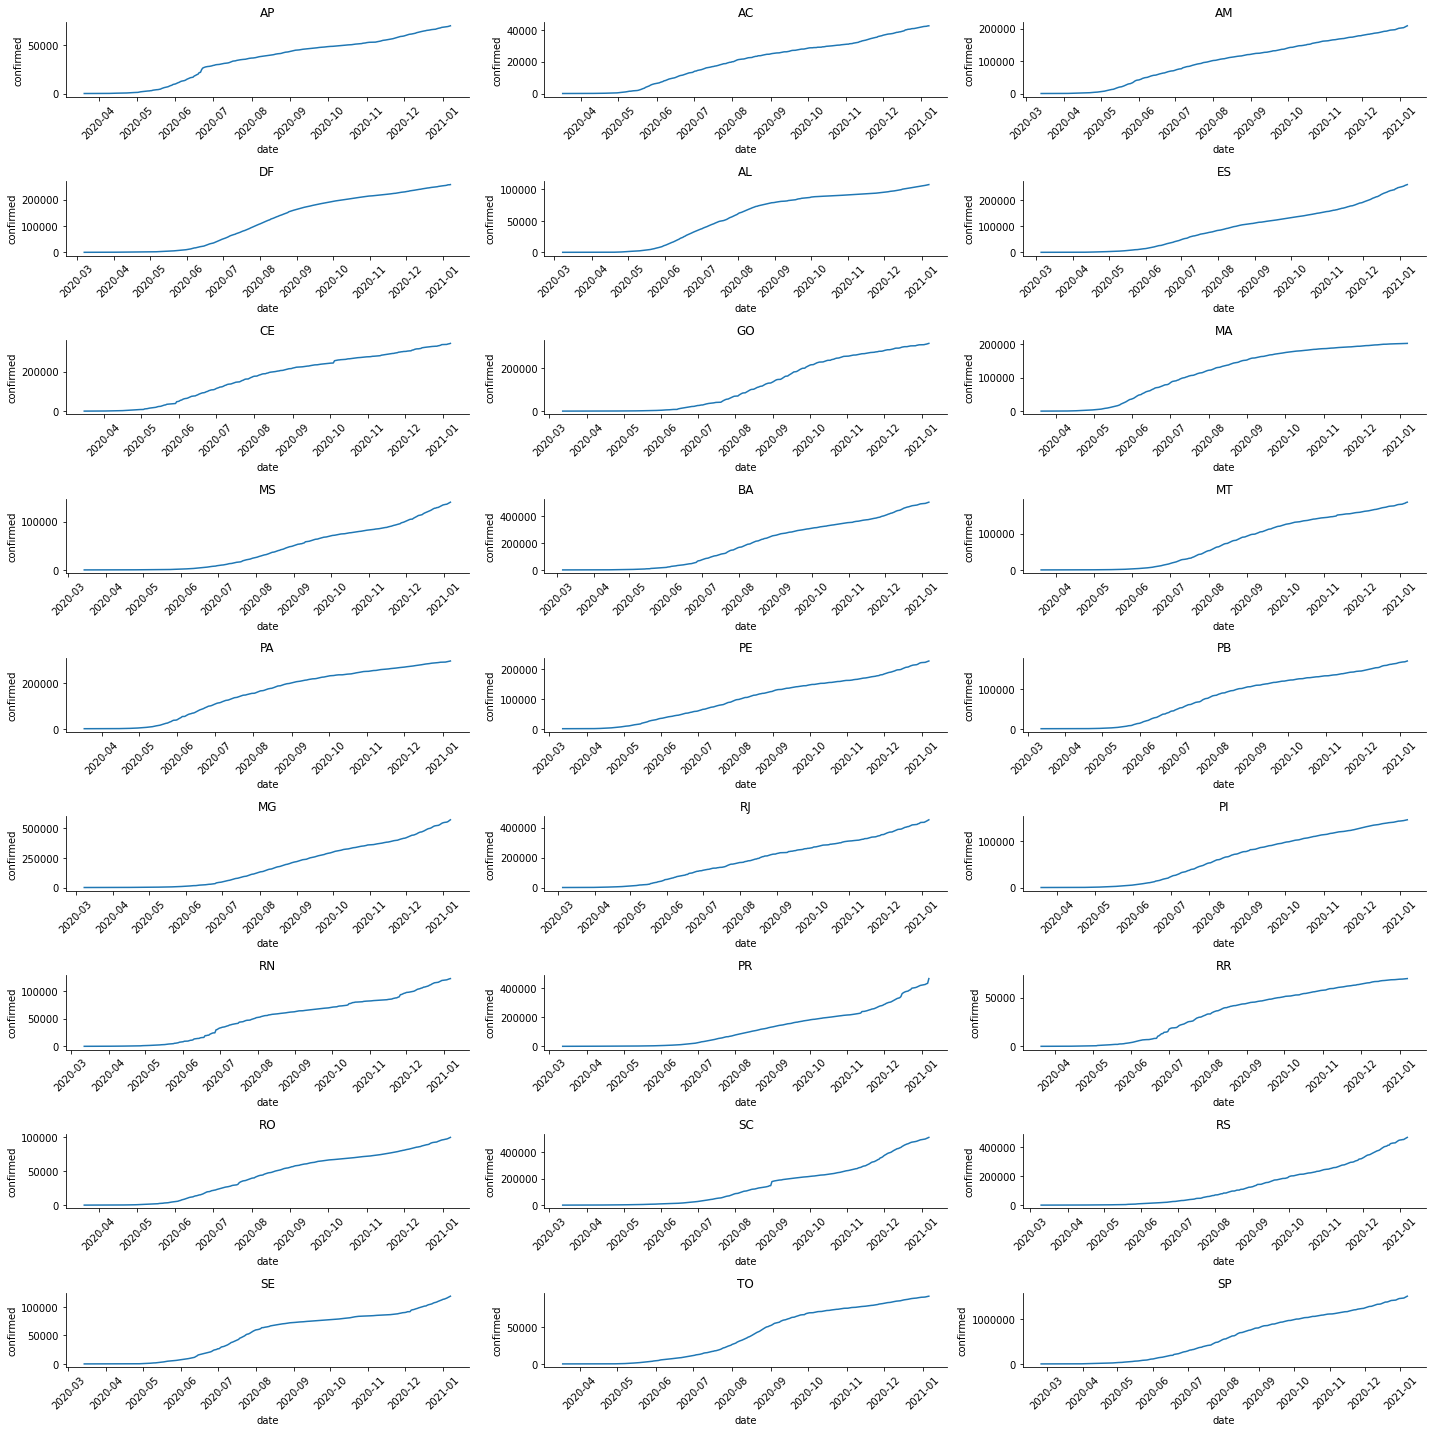

In [ ]:
#Visão geral casos confirmados por estado
plotBy(dataStates, 9, 3, "state", "date", "confirmed", False, False)

### III - Deaths
Número de mortes registradas

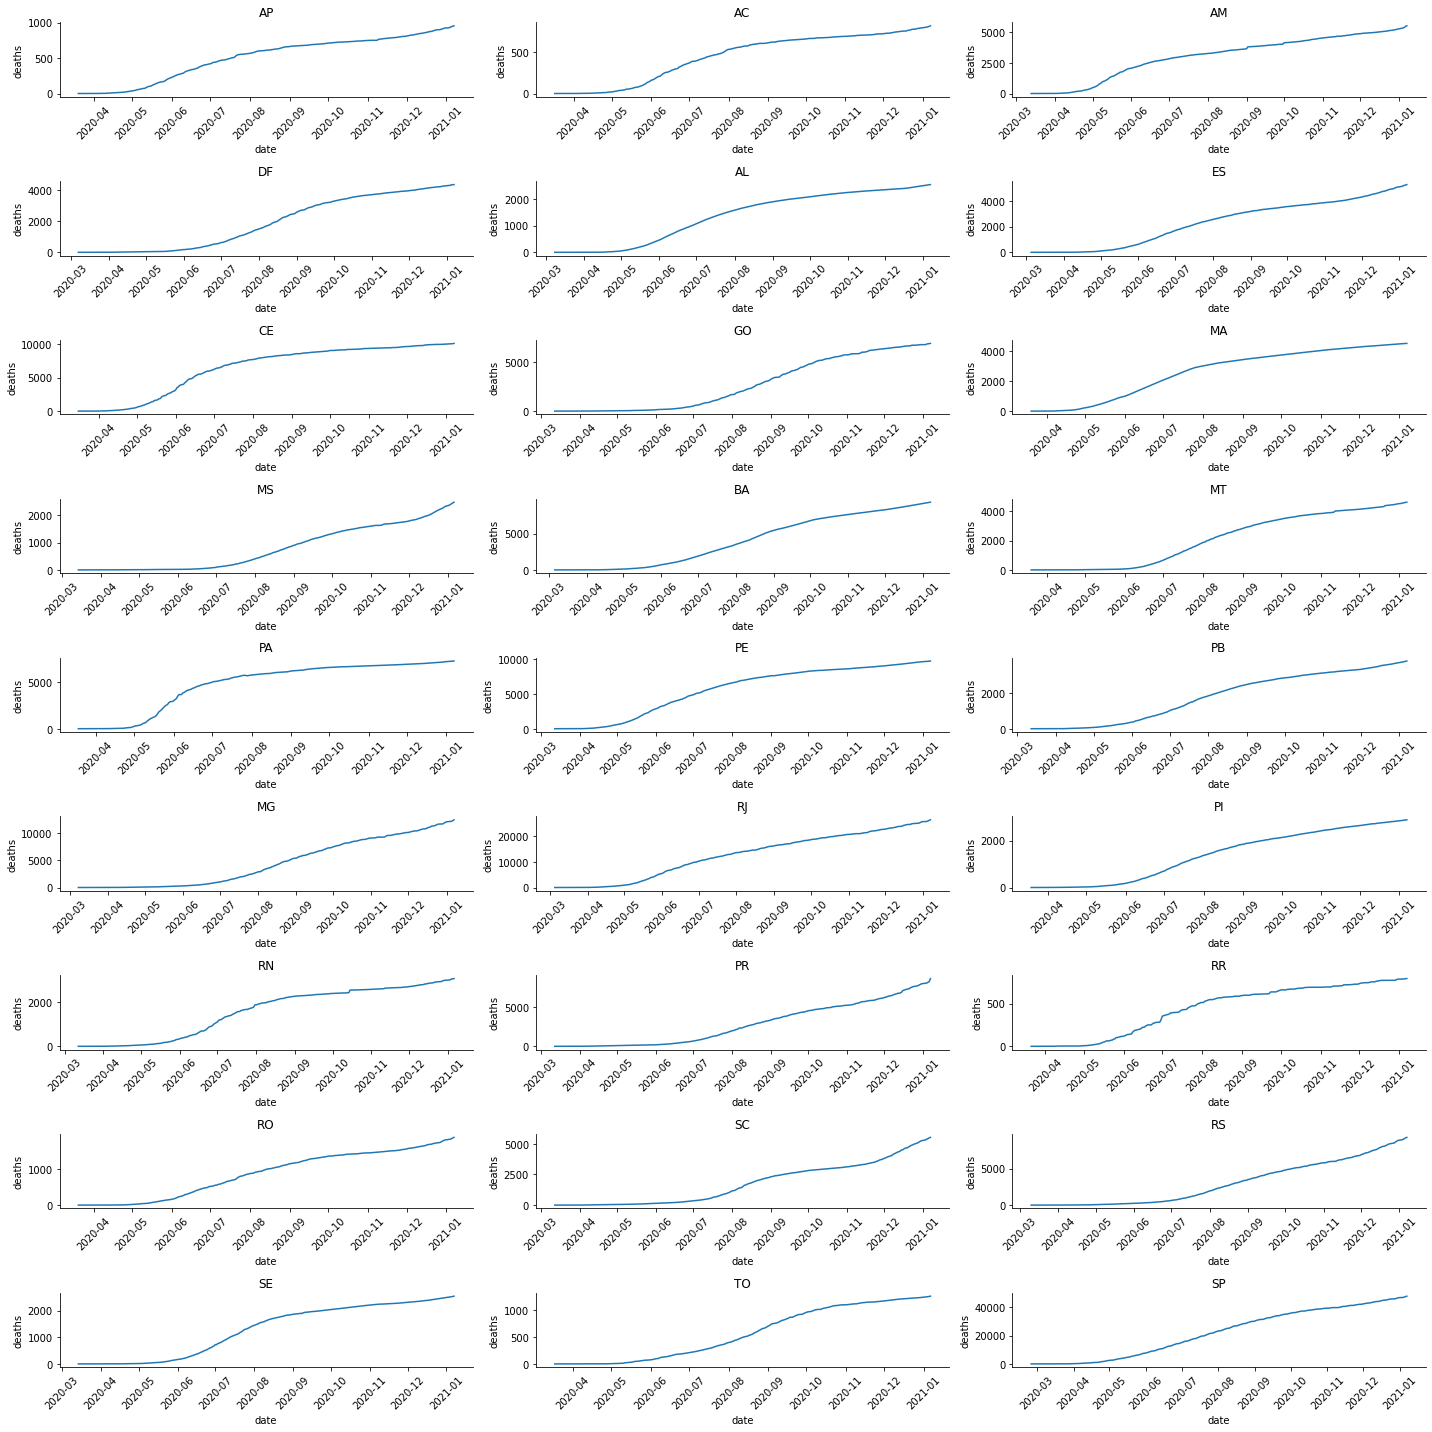

In [ ]:
#Visão geral de mortes por estado
plotBy(dataStates, 9, 3, "state", "date","deaths", False, False)

### IV - Confirmed_per_100k_inhabitants
Número de casos confirmados para cada 100 mil habitantes

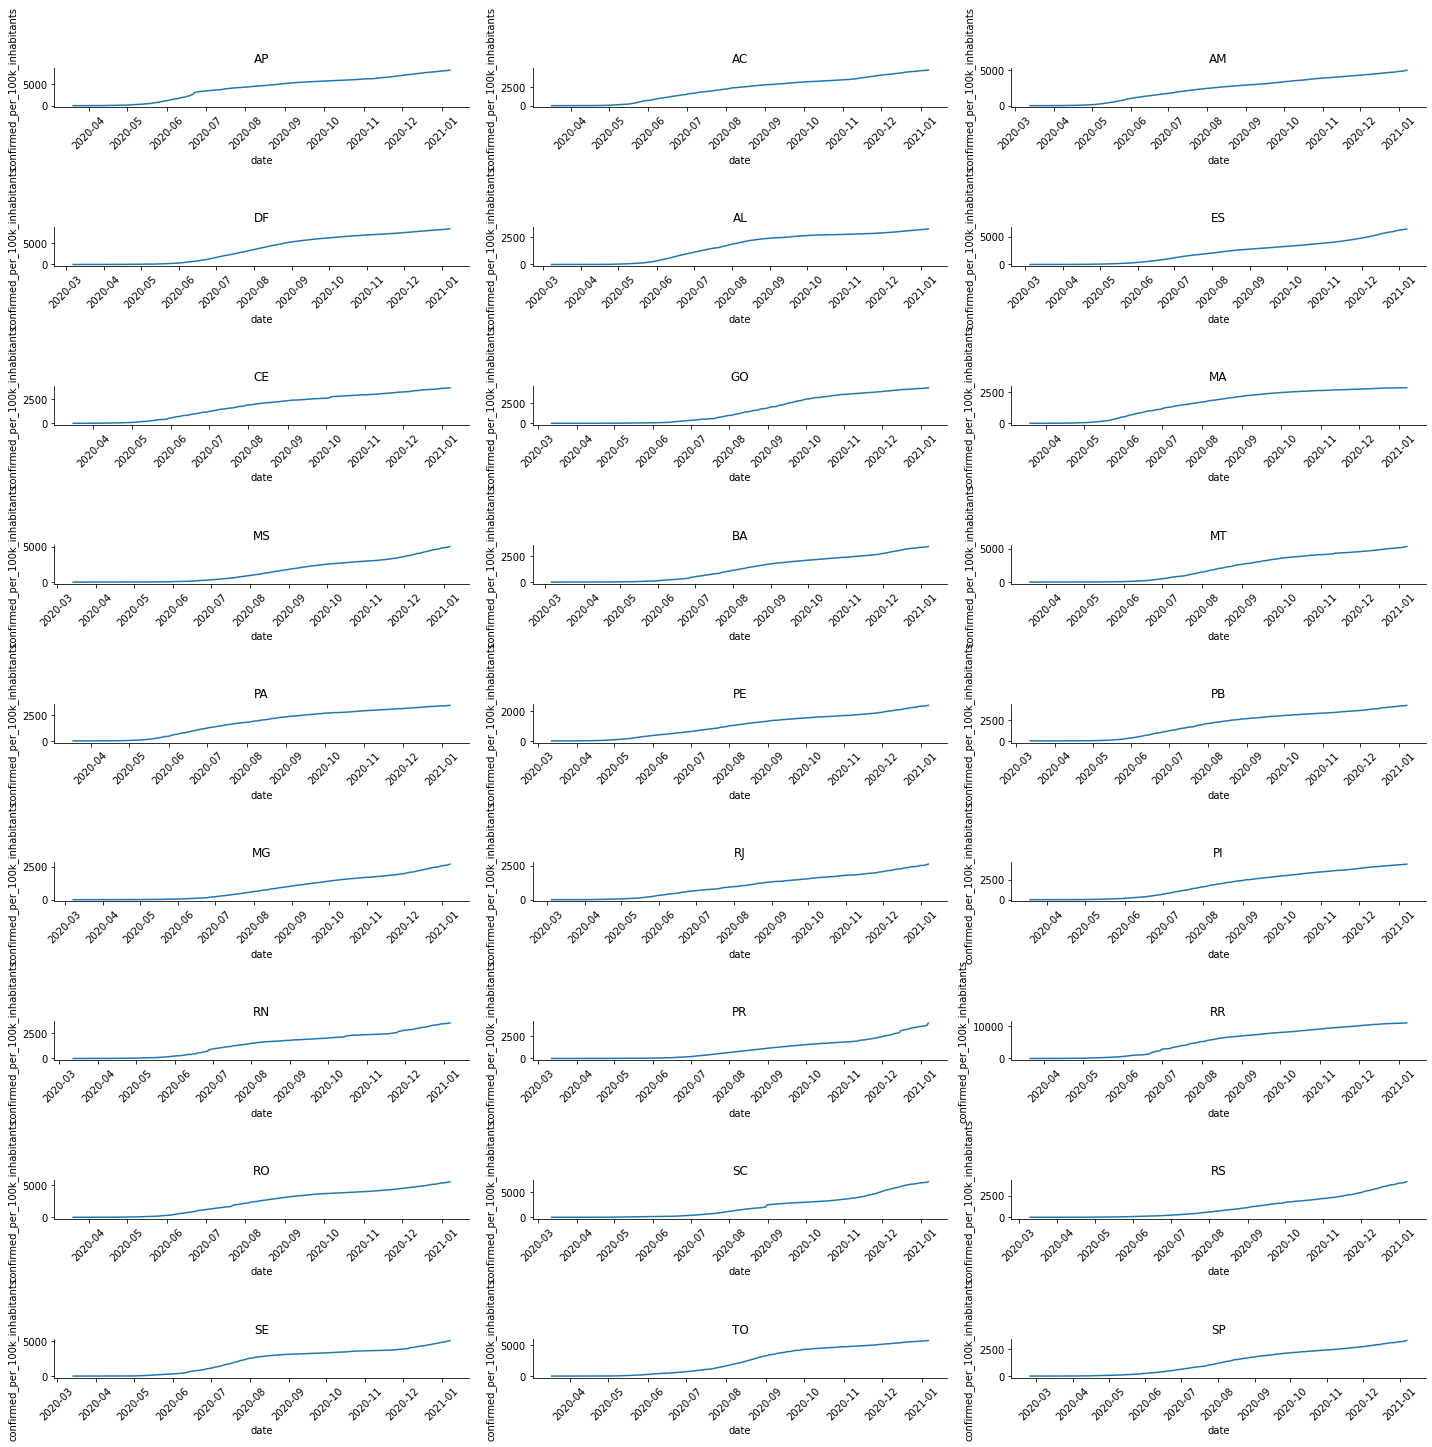

In [ ]:
#Visão geral casos confirmados a cada 100 mil habitantes por estado
plotBy(dataStates, 9, 3, "state", "date","confirmed_per_100k_inhabitants", False, False)

### V - Conclusão parcial
Ao gerar gráficos mostrando cada estado separadamente, percebi uma certa dificuldade em comparar os estados e tentar buscar possíveis relações e e construir hipóteses que se mostrem interessantes, por essa razão, logo a seguir, agruparei os estados por regiões. Veremos o que isso pode nos oferecer.


## 3 - Agrupar por regiões

A partir de um dicionário, crio uma coluna que *'etiqueta'* cada linha de registro com sua respectiva região.

In [ ]:
#Agrupar estados por regiões

regionsDict = {'AM': "Norte", 'BA': "Nordeste", 'CE': "Nordeste", 'DF': "Centro-Oeste", 'ES': "Sudeste", 'GO': "Centro-Oeste", 'MA': "Nordeste", 'MS': "Centro-Oeste", 
                'MG': "Sudeste", 'PB': "Nordeste", 'PR': "Sul", 'PE': "Nordeste", 'PI': "Nordeste",'RJ': "Sudeste", 'RN': "Nordeste", 'RS': "Sul", 'SC': "Sul",
                'SP': "Sudeste", 'SE': "Nordeste", 'AL': "Nordeste", 'AC': "Norte", 'AP': "Norte", 'TO': "Norte", 'PA': "Norte", 'MT': "Centro-Oeste", 'RO': "Norte",
                'RR': "Norte"}

dataStates["region"] = dataStates.state.apply(lambda x: regionsDict[x])
dataStates.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,region
0,2020-12-31,AP,estado,state,68201.0,925.0,283,False,845731.0,861773.0,16.0,7914.03305,0.0136,Norte
1,2020-12-30,AP,estado,state,67702.0,919.0,282,False,845731.0,861773.0,16.0,7856.12917,0.0136,Norte
2,2020-12-29,AP,estado,state,67405.0,913.0,281,False,845731.0,861773.0,16.0,7821.66533,0.0135,Norte
3,2020-12-28,AP,estado,state,67149.0,907.0,280,False,845731.0,861773.0,16.0,7791.95914,0.0135,Norte
4,2020-12-27,AP,estado,state,66724.0,901.0,279,False,845731.0,861773.0,16.0,7742.64220,0.0135,Norte


### I - Death_rate
Coluna que representa a taxa de morte registrada

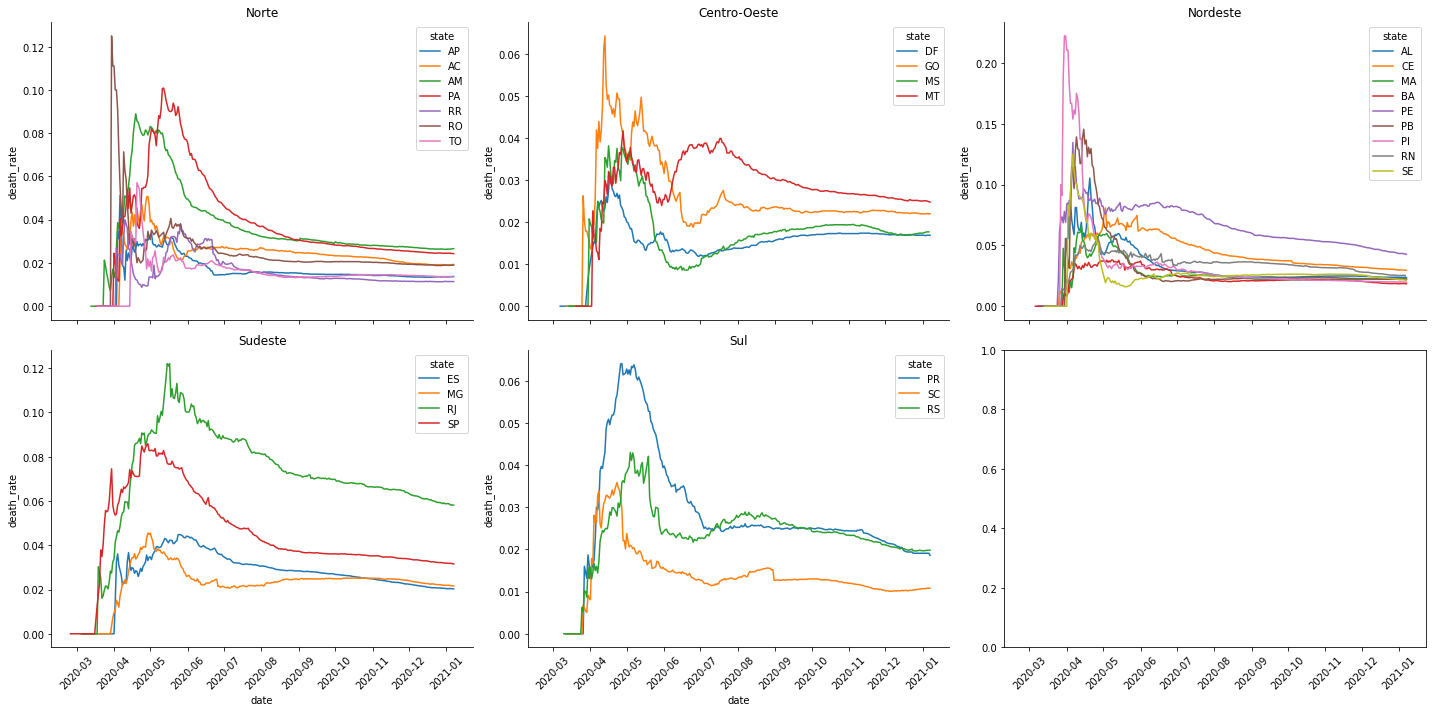

In [ ]:
plotBy(dataStates, 2, 3, "region", "date","death_rate", True, False, True, "state",(20,10))

### II - Confirmed
Número de casos confirmados

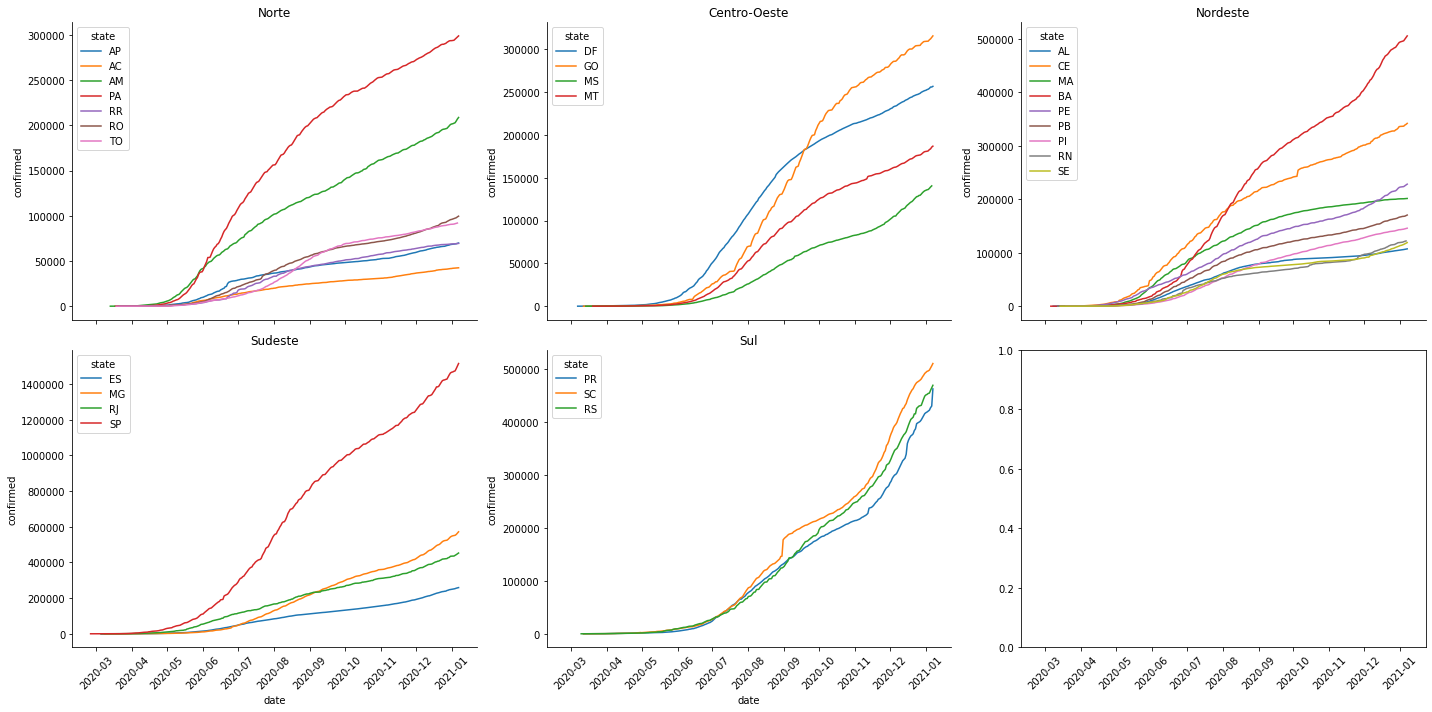

In [ ]:
plotBy(dataStates, 2, 3, "region", "date","confirmed", True, False, True, "state",(20,10))

### III - Deaths
Número de mortes registradas

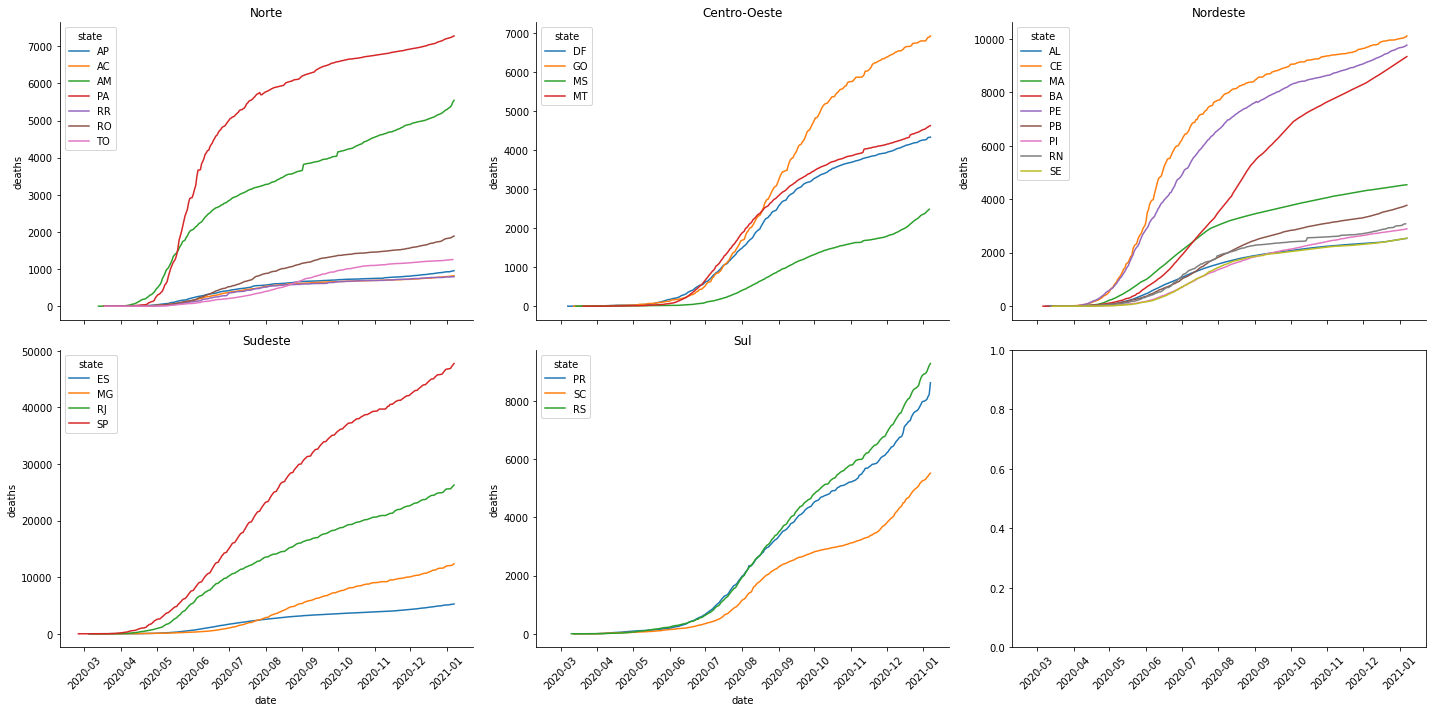

In [ ]:
plotBy(dataStates, 2, 3, "region", "date","deaths", True, False, True, "state",(20,10))

### IV - Confirmed_per_100k_inhabitants
Número de casos confirmados para cada 100 mil habitantes

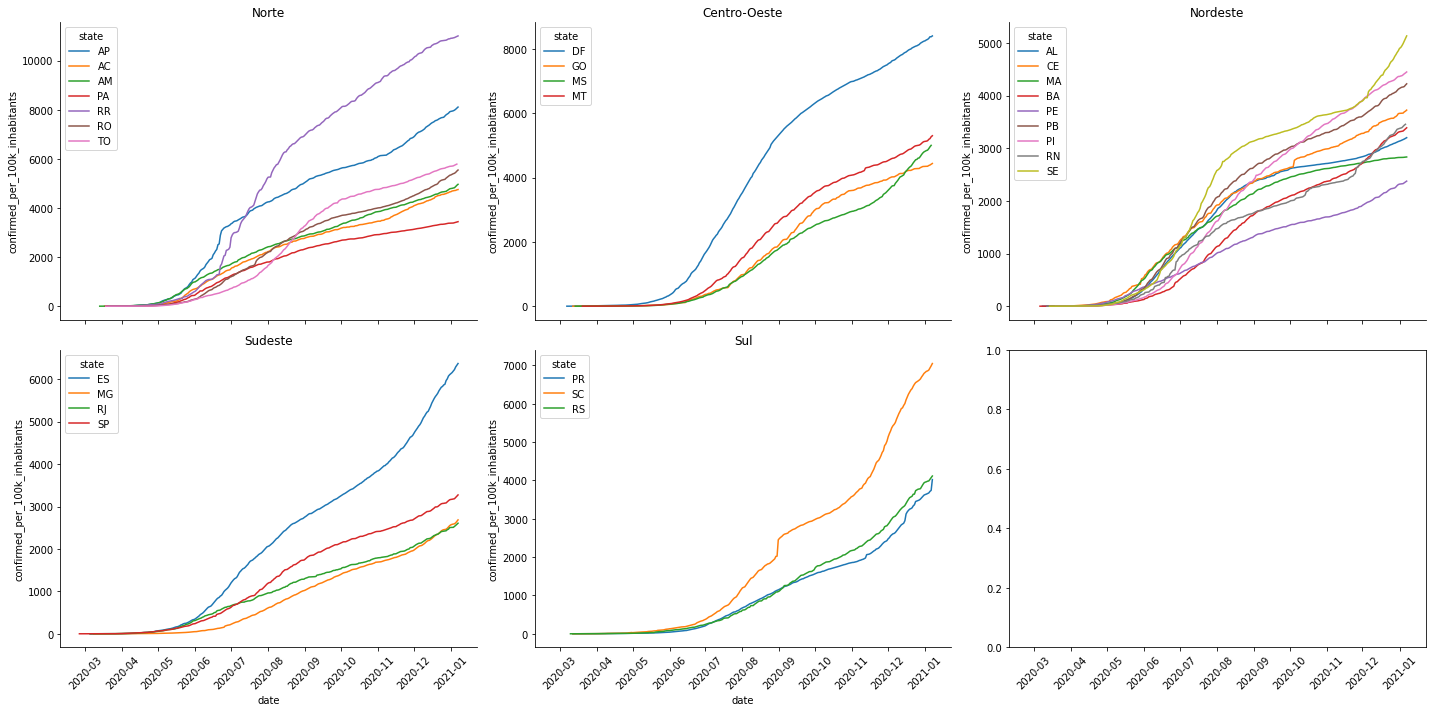

In [ ]:
plotBy(dataStates, 2, 3, "region", "date","confirmed_per_100k_inhabitants", True, False, True, "state",(20,10))

### V - Conclusão parcial
Com essa análise separada por regiões, conseguimos ver de maneira mais interessante algumas possíveis relações entre os dados registrados, por exemplo percebemos que alguns estados acabam se *'destacando'* em cada uma das regiões, o que nos trás algumas perguntas.


# Hipóteses a serem avaliadas

1. Esses resultados se relacionam com:
  - Tamanho absoluto da população?
  - Maior densidade demográfica?
  - Maior/menor investimento em saúde?
  - Educação?
  - IDH?
2. Com os dados que tenho, quais perguntas consigo responder:
  - Tamanho absoluto da população? Sim, coluna *'estimated_population'*
  - Maior densidade demográfica? Não, necessário mais informações
  - Maior/menor investimento em saúde? Não, necessário mais informações
  - Educação? Não, necessário mais informações
  - IDH? Não, necessário mais informações

## 1 - Buscando por correlações
Como observar a baixo, encontramos uma correlação de **0.92** ente o número de mortes e casos confirmados. Além de uma correlação de **0.60** e **0.67**, respectivamente, entre o tamanho da população e casos confirmados, casos cinfirmados e mortes. Contudo, acredito que isso seja o esperado, haja vista que se há uma população maior, haverá um maior número de casos confirmados e consequentemente, mais óbitos.

O ponto de estranhamento para mim nessa correlação foi a *'baixa'* correlação entre população estimada, mortes e confirmados. Apenas *'60%'*. Porém acredito que isso aconteça pois não necessáriamente as cidades maiores tiveram números de casos ou óbitos. Podemos observar isso nos gráficos gerados anteriormente.

In [ ]:
dataCorr = dataStates[["confirmed", "deaths", "estimated_population_2019", "estimated_population", "confirmed_per_100k_inhabitants", "death_rate","state", "region"]] 
corrMat = dataCorr.corr(method="pearson")
corrMat

,confirmed,deaths,estimated_population_2019,estimated_population,confirmed_per_100k_inhabitants,death_rate
confirmed,1.000000,0.922957,0.600850,0.601094,0.279181,-0.002574
deaths,0.922957,1.000000,0.674896,0.675082,0.122687,0.198311
estimated_population_2019,0.600850,0.674896,1.000000,0.999997,-0.233252,0.265408
estimated_population,0.601094,0.675082,0.999997,1.000000,-0.232801,0.265141
confirmed_per_100k_inhabitants,0.279181,0.122687,-0.233252,-0.232801,1.000000,-0.323958
death_rate,-0.002574,0.198311,0.265408,0.265141,-0.323958,1.000000


## 2 - Análise do pairplot

Atráves desse *pairplot* conseguimos ver o que discutimos anteriormente na tabela de correlação, acrescido de um agrupamento por regiões. Como esperado conseguimos ver que as regiões mais populosas também possuem mais casos confirmados, assim como óbitos. 

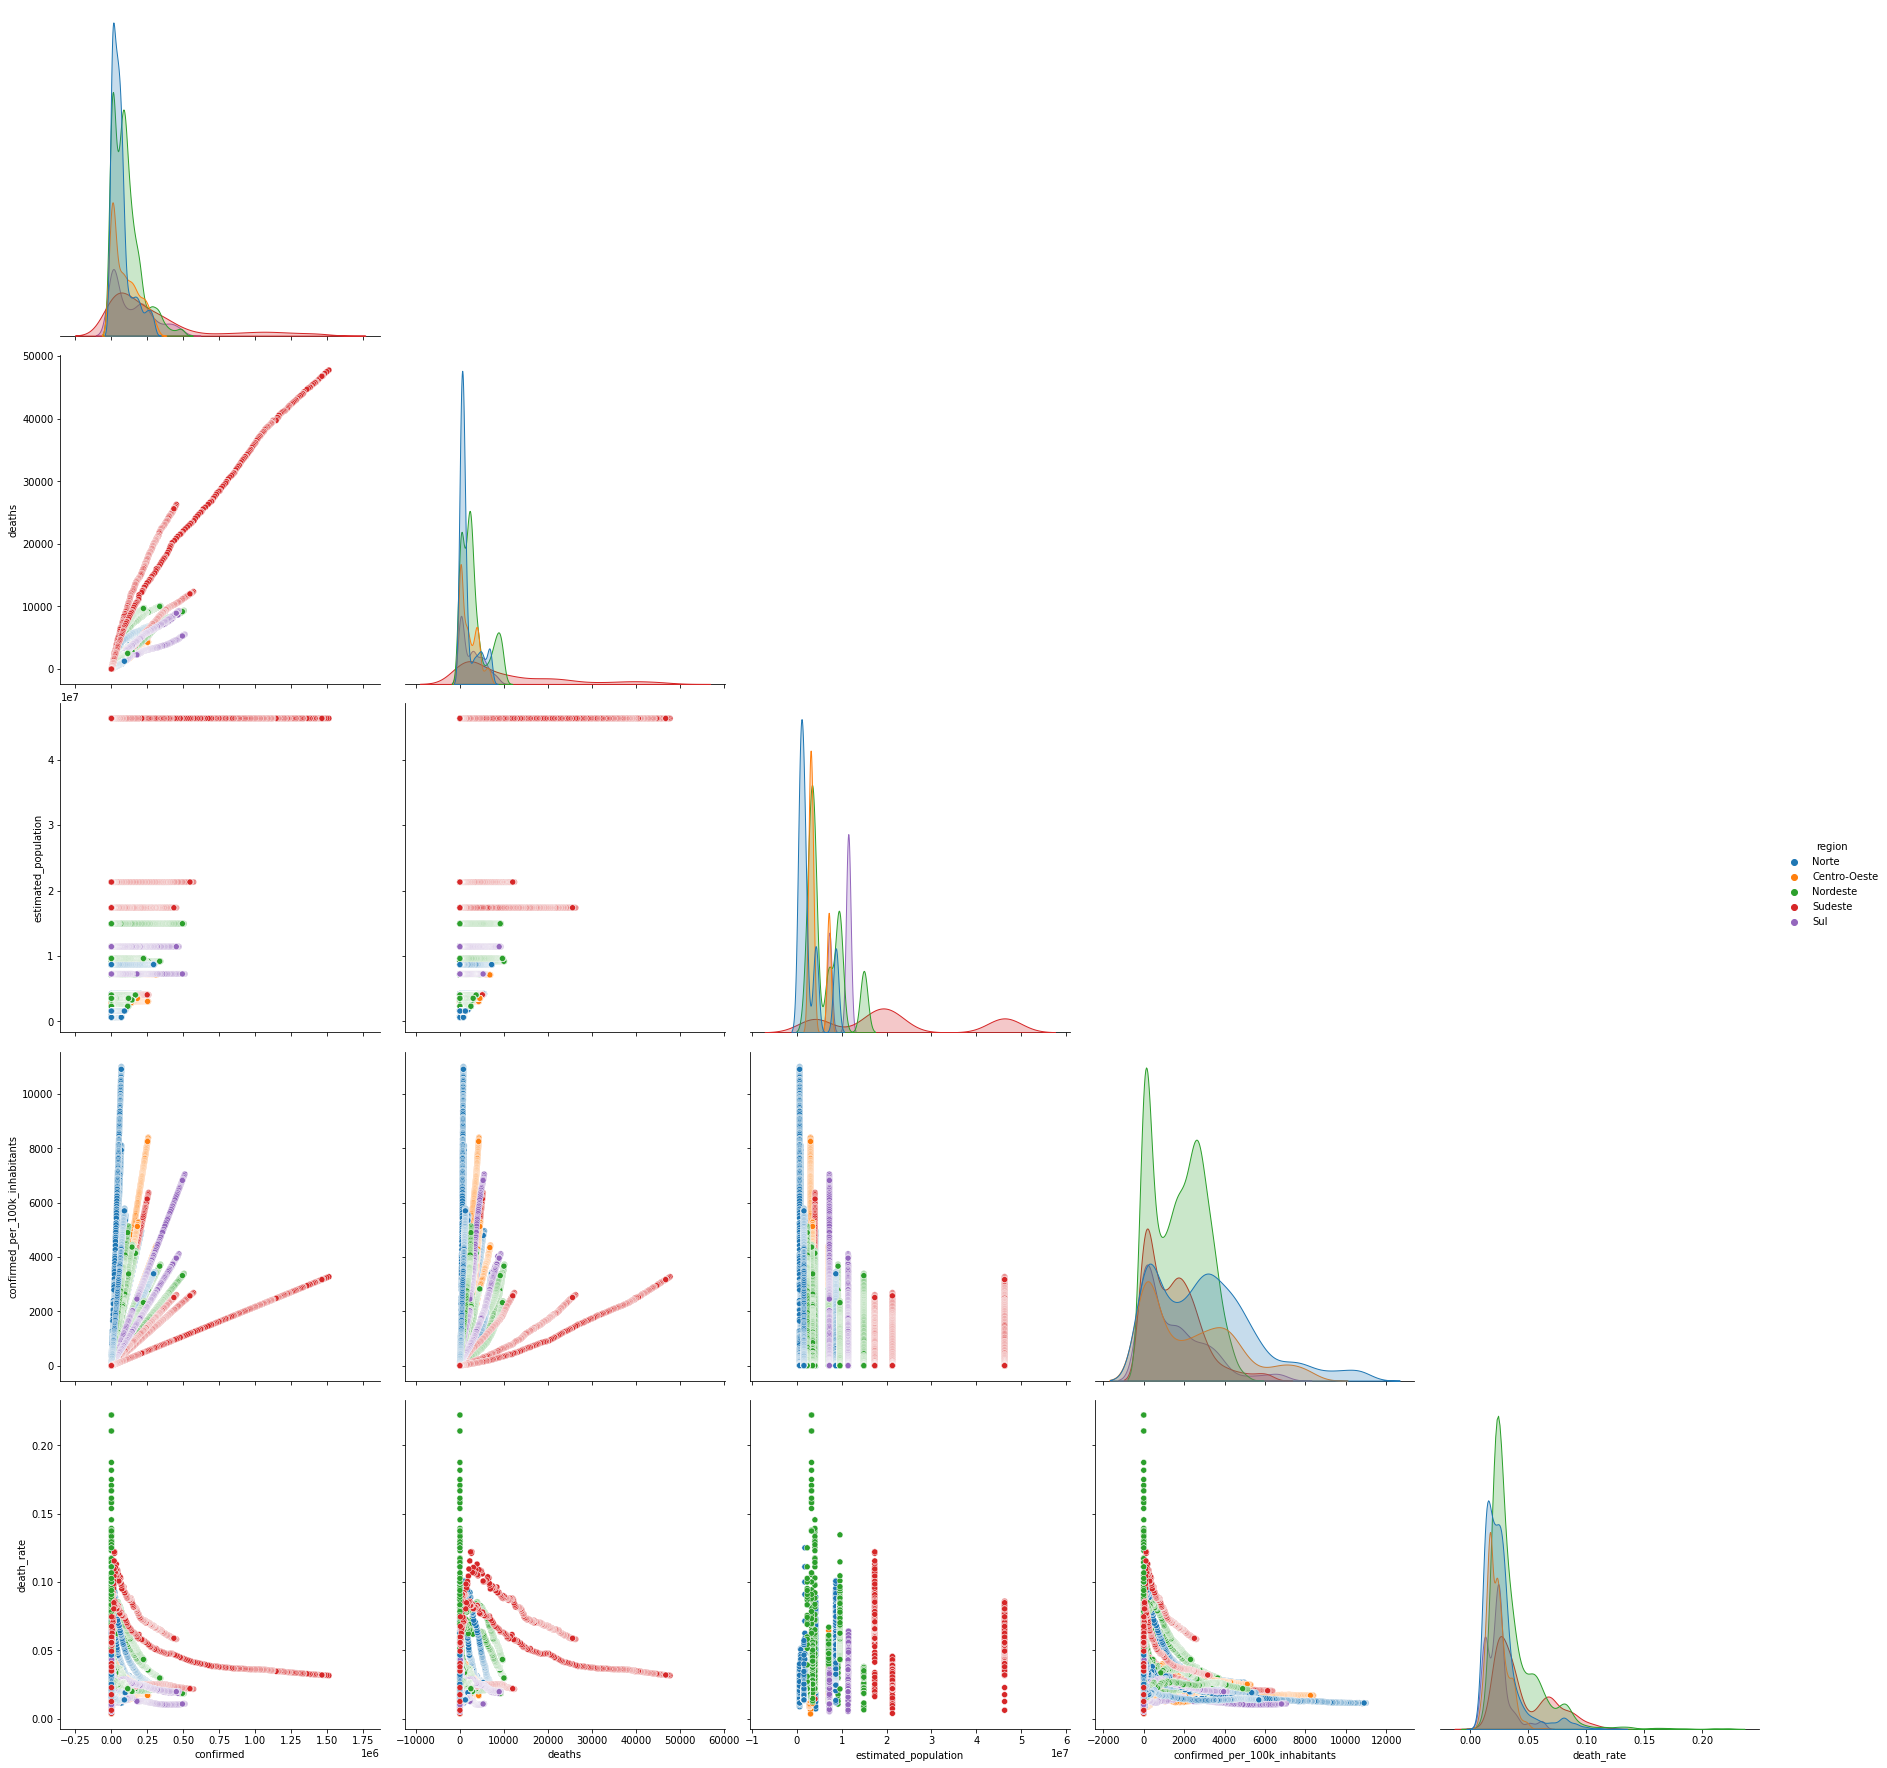

In [ ]:
aux = dataCorr[["confirmed", "deaths", "estimated_population", "confirmed_per_100k_inhabitants", "death_rate","state", "region"]]
sns.pairplot(aux[aux.death_rate > 0], hue="region", height=5, corner=True)

# Conclusão

As conclusões que alcancei foram bem simples e, de certa forma, óbvias. Infelizmente tive muita dificuldade em saber que tipo de informações seriam possíveis de se obter do conjunto de dados que optei por trabalhar. Felizmente, os dados sobre covid-19 foram mais interessantes de se análisar que os dados escolhidos e já citados na introdução.

Acredito que para chegar a informações mais interessantes e reveladores, o ideal seria alimentar esse trabalho com outros bancos de dados, com informações como IDH, densidade demográfica, escolaridade e investimento em saúde, por estado ou município. Creio que dessa forma, seria possível traçar correlações molhores entre os resultados registrados em cada estado, nos ajudando a entender, por exemplo, o porquê de alguns estados mesmo com uma população absoluta menor alcançou uma taxa de morte maior, relativo a centros mais populosos.



# Dúvidas

Uma questão que martelou minha cabela ao longo do desenvolvimento dessa pesquisa foi: como posso fazer perguntas mais interessantes e chegar a informações mais úteis, mesmo quando minha fonte de dados é *'simples'*? Ou será que estou sendo ingênuo ao desejar tirar conclusões extraordinárias de um conjunto de dados como o de covid-19 utilizado nesse tarbalho?
 